In [1]:
raw_data <- read.csv("SSL_RAT_RACE_CODE_60_70.csv", sep=",", header=T, strip.white = T, na.strings = c("NA","NaN","","?"))
#Converting the "." in column names to "_"
names(raw_data)<-gsub("\\.", "_", names(raw_data))
cat("The Number of Rows in Initial Data is", nrow(raw_data))

The Number of Rows in Initial Data is 6576

In [2]:
final_features<-raw_data[,c('SSL_SCORE','SSL_SCORE_RANK','PREDICTOR_RAT_AGE_AT_LATEST_ARREST','PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS',
                            'PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT','PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES','PREDICTOR_RAT_GANG_AFFILIATION', 
                           'PREDICTOR_RAT_NARCOTIC_ARRESTS','PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY','PREDICTOR_RAT_UUW_ARRESTS','RACE_CODE_CD')]

In [3]:
complete_data <- final_features[complete.cases(final_features),]
nrow(complete_data)

[1] 6576

In [4]:
head(complete_data)

SSL_SCORE,SSL_SCORE_RANK,PREDICTOR_RAT_AGE_AT_LATEST_ARREST,PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS,PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT,PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES,PREDICTOR_RAT_GANG_AFFILIATION,PREDICTOR_RAT_NARCOTIC_ARRESTS,PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY,PREDICTOR_RAT_UUW_ARRESTS,RACE_CODE_CD
263,260892,60-70,0,0,0,0,1,-0.1,0,0
260,266937,60-70,1,1,0,1,2,-0.2,0,0
241,299825,60-70,0,3,0,0,0,0.1,0,0
237,305335,60-70,0,1,1,0,3,1.0,1,0
235,309235,60-70,0,0,3,0,1,0.6,3,0
234,310018,60-70,0,3,0,0,0,-0.3,0,0


In [5]:
library(MatchIt)
library(dplyr)
library(ggplot2)

Warning message:
"package 'MatchIt' was built under R version 3.3.3"Warning message:
"package 'dplyr' was built under R version 3.3.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ggplot2' was built under R version 3.3.3"

In [6]:
#SSL_SCORE
complete_data %>%
  group_by(RACE_CODE_CD) %>%
  summarise(NUMBER_OF_PEOPLE = n(),
            MEAN_SSL_SCORE = mean(SSL_SCORE),
            STD_ERROR = sd(SSL_SCORE) / sqrt(NUMBER_OF_PEOPLE))

RACE_CODE_CD,NUMBER_OF_PEOPLE,MEAN_SSL_SCORE,STD_ERROR
0,4339,140.2136,0.2611074
1,2237,136.5762,0.3089025


In [7]:
# For SSL_SCORE_RANK
complete_data %>%
  group_by(RACE_CODE_CD) %>%
  summarise(NUMBER_OF_PEOPLE = n(),
            MEAN_SSL_SCORE_RANK = mean(SSL_SCORE_RANK),
            STD_ERROR = sd(SSL_SCORE_RANK) / sqrt(NUMBER_OF_PEOPLE))

RACE_CODE_CD,NUMBER_OF_PEOPLE,MEAN_SSL_SCORE_RANK,STD_ERROR
0,4339,391908.0,111.41457
1,2237,393293.1,81.48693


In [8]:
# T-test without PSM for SSL_SCORE and RACE_CODE_CD
attach(complete_data)
t.test(SSL_SCORE~RACE_CODE_CD)


	Welch Two Sample t-test

data:  SSL_SCORE by RACE_CODE_CD
t = 8.993, df = 5203.5, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 2.844490 4.430361
sample estimates:
mean in group 0 mean in group 1 
       140.2136        136.5762 


In [9]:
# T-test without PSM for SSL_SCORE_RANK and RACE_CODE_CD
t.test(SSL_SCORE_RANK~RACE_CODE_CD)


	Welch Two Sample t-test

data:  SSL_SCORE_RANK by RACE_CODE_CD
t = -10.035, df = 6571.9, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1655.741 -1114.558
sample estimates:
mean in group 0 mean in group 1 
       391908.0        393293.1 


In [10]:
mod_match <- matchit(RACE_CODE_CD ~ PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS + PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT + 
            PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES + PREDICTOR_RAT_GANG_AFFILIATION + PREDICTOR_RAT_NARCOTIC_ARRESTS + PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY +
            PREDICTOR_RAT_UUW_ARRESTS,
                     method = "nearest", data = complete_data)

In [11]:
mod_match


Call: 
matchit(formula = RACE_CODE_CD ~ PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS + 
    PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT + PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES + 
    PREDICTOR_RAT_GANG_AFFILIATION + PREDICTOR_RAT_NARCOTIC_ARRESTS + 
    PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY + PREDICTOR_RAT_UUW_ARRESTS, 
    data = complete_data, method = "nearest")

Sample sizes:
          Control Treated
All          4339    2237
Matched      2237    2237
Unmatched    2102       0
Discarded       0       0


In [12]:
matched <- match.data(mod_match)
matched_copy<-matched

[1] "To identify the units, use first mouse button; to stop, use second."


integer(0)

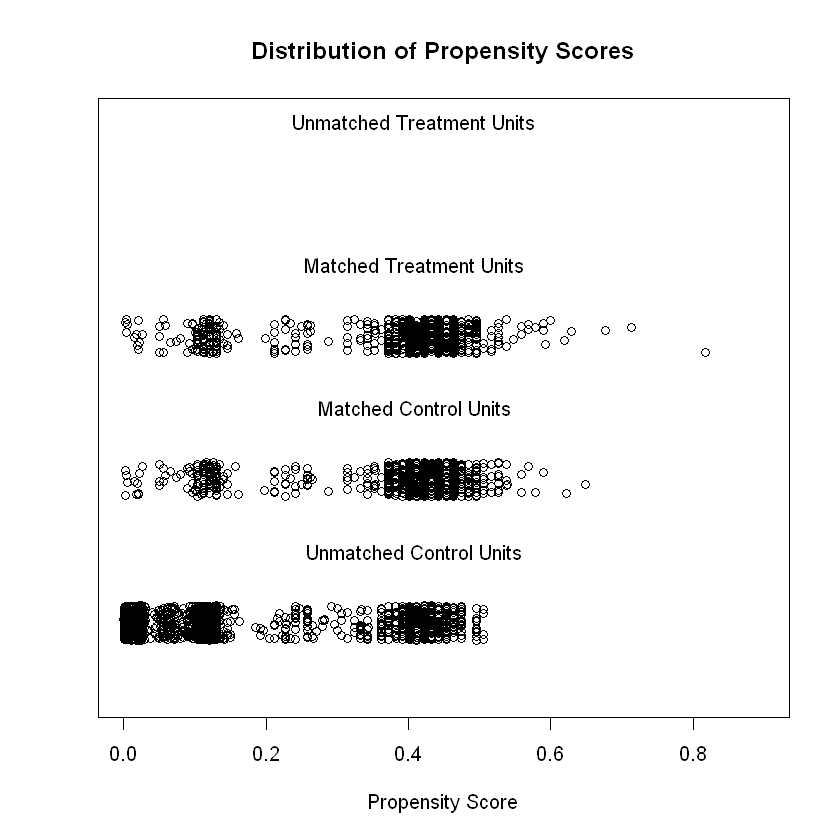

In [13]:
plot(mod_match, type = "jitter")

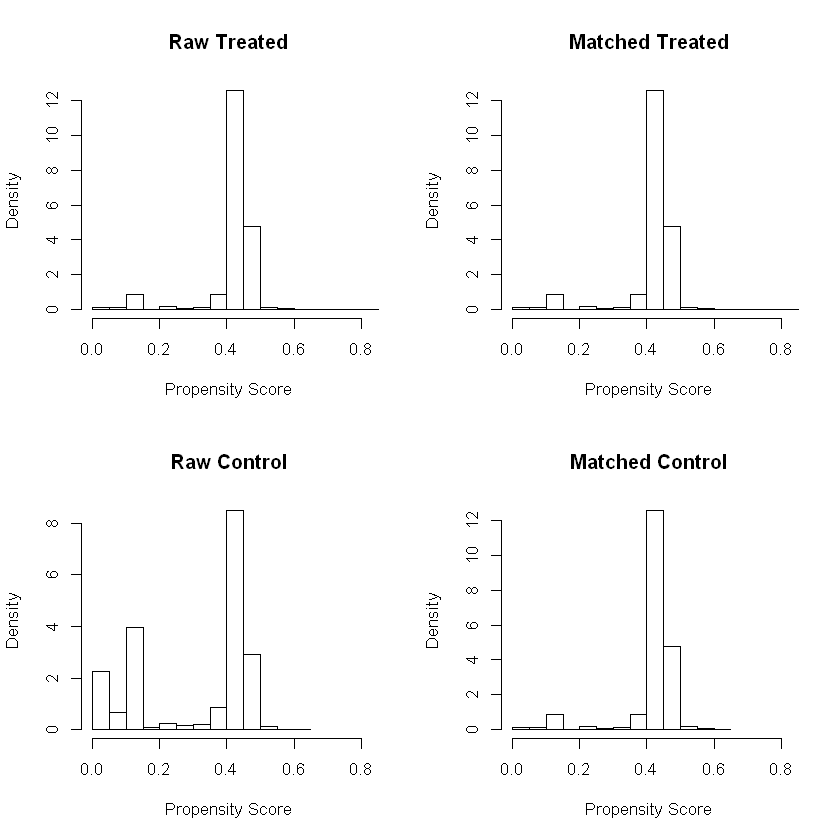

In [14]:
plot(mod_match, type = "hist")

In [15]:
head(matched)

,SSL_SCORE,SSL_SCORE_RANK,PREDICTOR_RAT_AGE_AT_LATEST_ARREST,PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS,PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT,PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES,PREDICTOR_RAT_GANG_AFFILIATION,PREDICTOR_RAT_NARCOTIC_ARRESTS,PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY,PREDICTOR_RAT_UUW_ARRESTS,RACE_CODE_CD,distance,weights
15,215,336257,60-70,0,0,2,0,3,0.6,1,1,0.001881264,1
16,213,339360,60-70,0,0,2,0,0,2.2,0,0,0.621843750,1
29,199,354995,60-70,0,0,3,0,0,2.1,0,1,0.592871871,1
30,199,354995,60-70,0,0,2,0,0,0.1,1,1,0.227206509,1
33,196,358581,60-70,0,0,0,0,0,-0.2,0,0,0.411395172,1
34,196,358581,60-70,0,0,0,0,1,0.1,0,1,0.120774236,1


In [16]:
# Doing T - test on matched records
attach(matched)

The following objects are masked from complete_data:

    PREDICTOR_RAT_AGE_AT_LATEST_ARREST,
    PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES,
    PREDICTOR_RAT_GANG_AFFILIATION, PREDICTOR_RAT_NARCOTIC_ARRESTS,
    PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY,
    PREDICTOR_RAT_UUW_ARRESTS, PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT,
    PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS, RACE_CODE_CD, SSL_SCORE,
    SSL_SCORE_RANK



In [17]:
race_black <-subset(matched,RACE_CODE_CD == 0)
race_white<-subset(matched,RACE_CODE_CD == 1)


In [18]:
t.test(SSL_SCORE~RACE_CODE_CD)


	Welch Two Sample t-test

data:  SSL_SCORE by RACE_CODE_CD
t = 0.80774, df = 4469.9, p-value = 0.4193
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.4982518  1.1965084
sample estimates:
mean in group 0 mean in group 1 
       136.9253        136.5762 


In [19]:
t.test(SSL_SCORE_RANK~RACE_CODE_CD)


	Welch Two Sample t-test

data:  SSL_SCORE_RANK by RACE_CODE_CD
t = -0.16204, df = 4448.2, p-value = 0.8713
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -236.1173  200.0655
sample estimates:
mean in group 0 mean in group 1 
       393275.1        393293.1 
